<a href="https://colab.research.google.com/github/Josh0527/FinComm-Customer-Churn-Prediction/blob/main/Customer_Churn_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import data

import kagglehub
import os

#define dataset source path
path = kagglehub.dataset_download("abdallahwagih/telco-customer-churn")
print("Path to dataset files:", path)

#check url for file name
os.listdir(path)

100%|██████████| 1.25M/1.25M [00:00<00:00, 12.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/telco-customer-churn/versions/1


['Telco_customer_churn.xlsx']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import xlsx file

df = pd.read_excel(path + '/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


What is FinCom current churn rate?
At what rate are they experiencing churn?

In [ ]:
#calculate current churn rate

churn_rate = df['Churn Label'].value_counts(normalize=True)['Yes'] * 100
churn_rate

np.float64(26.536987079369588)

In [ ]:
#columns check

df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
#check data structure
#descriptive statistics

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


#EDA

Churn rate count

In [ ]:
df['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


The Churn reason count is justified. Next is understanding why these customers are leaving, what are the top reasons they are leaving?

In [ ]:
df_churn = df.groupby('Churn Reason').size().reset_index(name='counts').sort_values('counts', ascending=False)
df_churn

,Churn Reason,counts
1,Attitude of support person,192
4,Competitor offered higher download speeds,189
5,Competitor offered more data,162
7,Don't know,154
3,Competitor made better offer,140
0,Attitude of service provider,135
2,Competitor had better devices,130
14,Network reliability,103
18,Product dissatisfaction,102
17,Price too high,98


Are churn patterns influenced by the plans they do?

Churn Rate by Contract Type

In [ ]:
#map labels to numeric (1 & 0)

df['Churn Flag'] = df['Churn Label'].map({'Yes':1, 'No':0})
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Churn Flag
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,1


In [ ]:
#filter Churn Label = 1

churners = df[df['Churn Flag'] == 1]
churners.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Churn Flag
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,1


In [ ]:
#callable bar labelling

def add_bar_labels(ax, fmt='int', fontsize=11, fontweight='bold', color='black', padding=3):
    """
    Add labels to bars in a seaborn/matplotlib barplot.

    """
    for p in ax.patches:
        height = p.get_height()
        if fmt == 'int':
            label = f'{int(height)}'
        elif fmt == 'float':
            label = f'{height:.2f}'
        else:
            label = str(height)

        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2, height + padding),
                    ha='center', va='bottom',
                    fontsize=fontsize, fontweight=fontweight, color=color)

<ipython-input-62-77eab0300136>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contract_churn.index, y=contract_churn.values, palette='viridis')


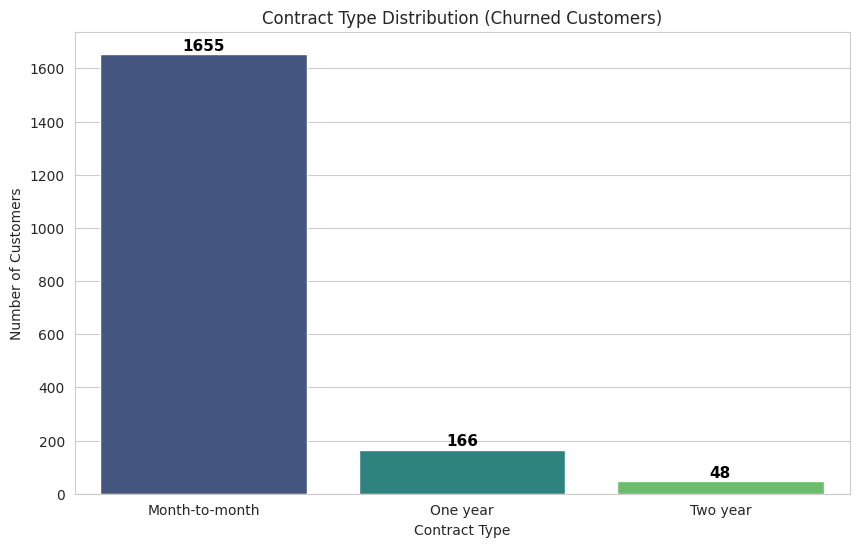

In [ ]:
#what does the churn rate looks like based on customers contract?

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

contract_churn = churners['Contract'].value_counts()

#plot

ax = sns.barplot(x=contract_churn.index, y=contract_churn.values, palette='viridis')
plt.title('Contract Type Distribution (Churned Customers)')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.xticks()

#Add labels on bars
add_bar_labels(ax, fmt='int')

plt.show()

Month-Month customers left the most. Quite a large number. Let's relate them to the reason why they left

 We have 2 questions to answer now:
* Among month-to-month churners (1655 people), what were their top churn reasons?

* How much CLTV ($) did we lose from churners for each top reason?




<ipython-input-76-b42519e0f697>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


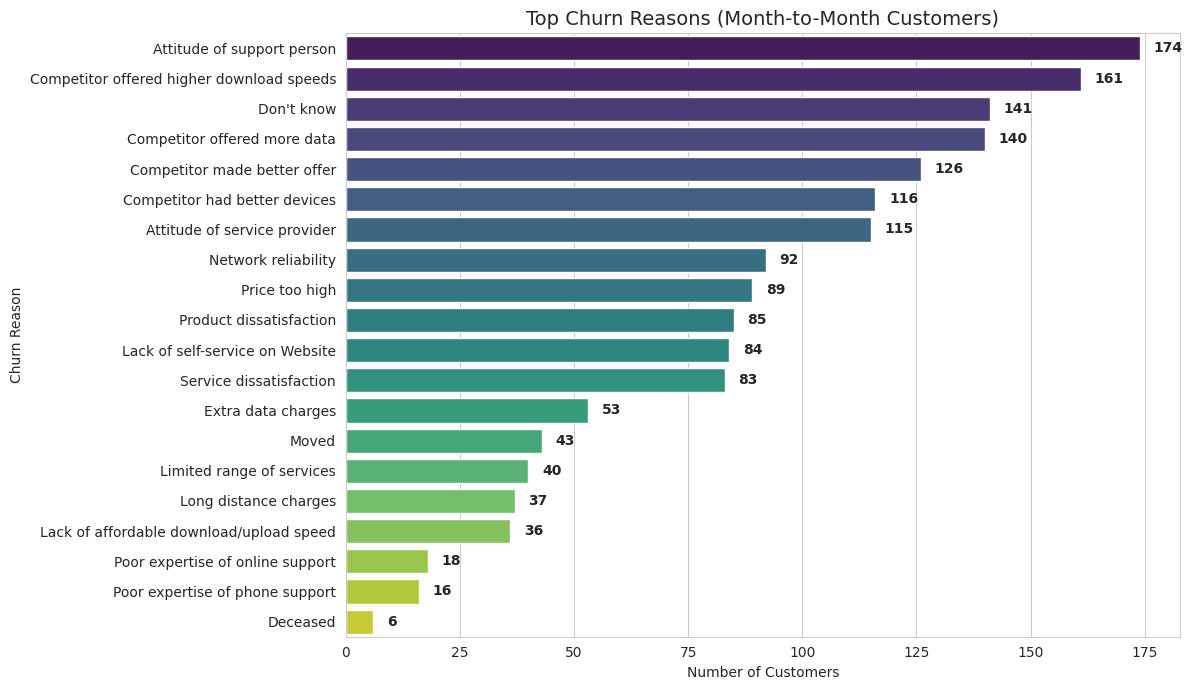

In [ ]:
#filter for month-month churners only

mtm_churners = churners[churners['Contract'] == 'Month-to-month']
mtm_churners.head(3)

#groupby reasons the left
reason_sorted = mtm_churners['Churn Reason'].value_counts().sort_values(ascending=False)

#plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    y=reason_sorted.index,  #Horizontal bars
    x=reason_sorted.values,
    palette='viridis'
)

plt.title('Top Churn Reasons (Month-to-Month Customers)', fontsize=14)
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}',
                (width + 3, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, fontweight='bold')

#show
plt.tight_layout()
plt.show()


How much has been lost due to this?

<ipython-input-81-7927b3608392>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reason_cltv.values, y=reason_cltv.index, palette='viridis')


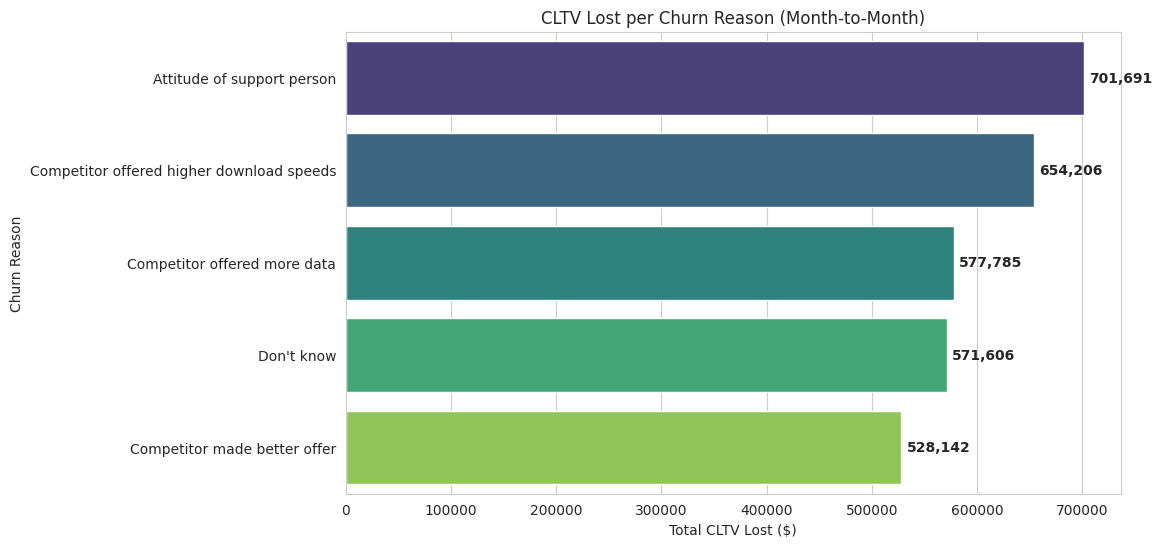

In [ ]:
# Sum CLTV by top 5 churn reason
reason_cltv = mtm_churners.groupby('Churn Reason')['CLTV'].sum().sort_values(ascending=False).head(5)

# Plot
ax = sns.barplot(x=reason_cltv.values, y=reason_cltv.index, palette='viridis')
plt.title('CLTV Lost per Churn Reason (Month-to-Month)')
plt.xlabel('Total CLTV Lost ($)')
plt.ylabel('Churn Reason')

#label
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width + 5000, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, fontweight='bold')


plt.show()

How does the distribution look for tenure? Short and long term customers

In [ ]:
#Create tenure buckets
def tenure_bucket(tenure):
    if tenure <= 12:
        return 'Short-term (≤12mo)'
    elif 13 <= tenure <= 36:
        return 'Mid-term (13-36mo)'
    else:
        return 'Long-term (>36mo)'

#Apply bucket to dataset
churners['Tenure Group'] = churners['Tenure Months'].apply(tenure_bucket)

#Cross-tab churn reason vs tenure bucket (counts)
tenure_reason_ct = pd.crosstab(churners['Churn Reason'], churners['Tenure Group'])

#Sort table by Short-term churners descending
tenure_reason_ct = tenure_reason_ct.sort_values(by='Short-term (≤12mo)', ascending=False)
tenure_reason_ct.head(6)

<ipython-input-93-1f2baf2c3f4f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churners['Tenure Group'] = churners['Tenure Months'].apply(tenure_bucket)


Tenure Group,Long-term (>36mo),Mid-term (13-36mo),Short-term (≤12mo)
Churn Reason,,,
Attitude of support person,37,50,105
Competitor offered higher download speeds,41,49,99
Competitor offered more data,38,35,89
Competitor made better offer,21,32,87
Don't know,25,47,82
Competitor had better devices,24,28,78


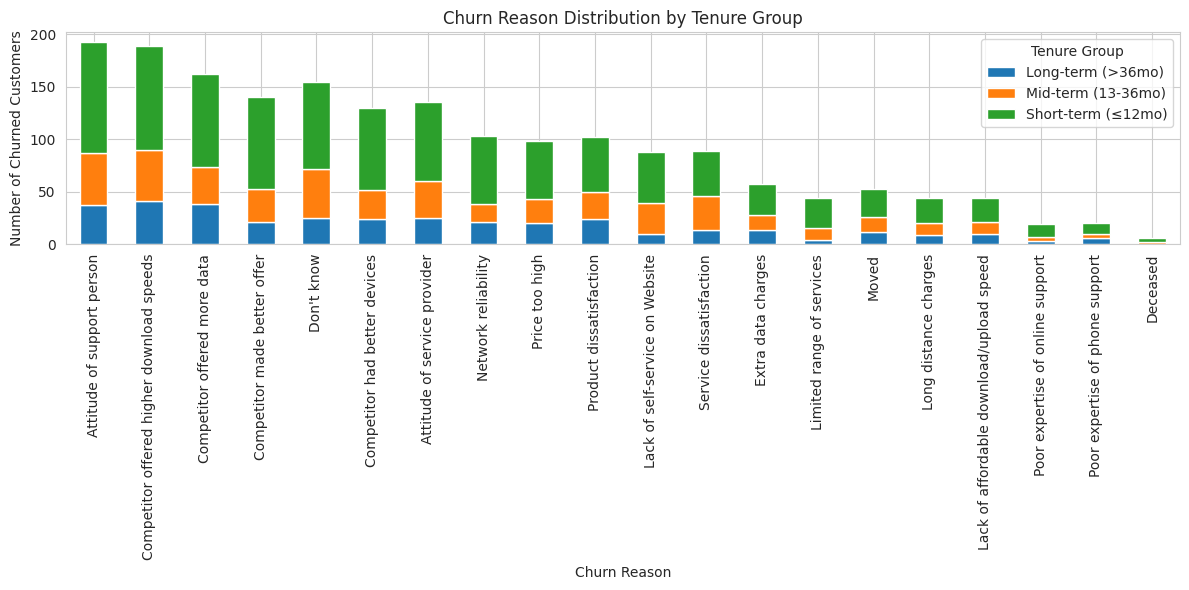

In [ ]:
#plot
#stacked bar chart
tenure_reason_ct.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('Churn Reason Distribution by Tenure Group')
plt.xlabel('Churn Reason')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=90)
plt.legend(title='Tenure Group')
plt.tight_layout()
plt.show()


In [ ]:
#Month-to-Month churners
mtm_churned = churners[churners['Contract'] == 'Month-to-month']

#Count how many are Short-term (Tenure ≤ 12 months)
short_term_mtm = mtm_churned[mtm_churned['Tenure Months'] <= 12]

# Display count
short_term_mtm_count = short_term_mtm.shape[0]
print(f'Short-term Month-to-Month churners: {short_term_mtm_count}')


Short-term Month-to-Month churners: 1024


In [ ]:
# Sum of CLTV lost from short-term MTM churners
short_term_mtm_cltv_lost = short_term_mtm['CLTV'].sum()
print(f'CLTV lost from short-term MTM churners: ${short_term_mtm_cltv_lost:,.0f}')

CLTV lost from short-term MTM churners: $4,145,501


In [ ]:
# Potential savings from 15% churn reduction in this segment
savings = 0.15 * 4145501
print(f'Potential CLTV savings (15% churn reduction): ${savings:,.0f}')

Potential CLTV savings (15% churn reduction): $621,825


Monthly Charges vs Churn Reason (Price Sensitivity)


* are they really paying charges about the mean of $64?





In [ ]:
#Filter short-term MTM churners dataset
short_mtm_churners = df[(df['Churn Label'] == 'Yes') &
                        (df['Contract'] == 'Month-to-month') &
                        (df['Tenure Months'] <= 12)]

# Group by Churn Reason and calculate average Monthly Charges
price_sensitivity = short_mtm_churners.groupby('Churn Reason')['Monthly Charges'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

price_sensitivity.rename(columns={'count': 'Customer Count', 'mean': 'Avg Monthly Charges'}, inplace=True)
price_sensitivity


,Customer Count,Avg Monthly Charges
Churn Reason,,
Moved,27,71.709259
Long distance charges,24,70.733333
Competitor offered more data,87,70.005747
Price too high,55,69.771818
Attitude of service provider,75,69.602000
Network reliability,65,68.819231
Deceased,4,68.250000
Competitor made better offer,87,67.825287
Competitor offered higher download speeds,94,67.175000


#Customer Segmentation

In [ ]:
#segmentation by tenure group
def tenure_group(tenure):
    if tenure <= 12:
        return 'Short-term'
    elif 13 <= tenure <= 36:
        return 'Mid-term'
    else:
        return 'Long-term'

df['Tenure Group'] = df['Tenure Months'].apply(tenure_group)

# Combine tenure + churn reason
segmented_df = df[df['Churn Label'] == 'Yes'].groupby(['Tenure Group', 'Churn Reason']).agg({'CLTV': 'sum', 'Monthly Charges': 'mean'}).reset_index()
segmented_df

,Tenure Group,Churn Reason,CLTV,Monthly Charges
0,Long-term,Attitude of service provider,109408,95.750000
1,Long-term,Attitude of support person,174966,88.147297
2,Long-term,Competitor had better devices,114501,96.216667
3,Long-term,Competitor made better offer,88306,96.142857
4,Long-term,Competitor offered higher download speeds,195606,90.158537
5,Long-term,Competitor offered more data,183565,85.863158
6,Long-term,Don't know,114293,84.784000
7,Long-term,Extra data charges,65616,97.389286
8,Long-term,Lack of affordable download/upload speed,52764,85.620000
9,Long-term,Lack of self-service on Website,48550,87.485000


# FEATURE ANALYSIS

In [ ]:
churners = df[df['Churn Label'] == 'Yes']
churners['Streaming Movies'].value_counts()

,count
Streaming Movies,
No,938
Yes,818
No internet service,113


In [ ]:
#columns you to analyze
feature_cols = ['Streaming TV', 'Streaming Movies', 'Tech Support', 'Device Protection', 'Online Backup', 'Online Security']

#% usage and non-usage among churners
churn_feature_usage = churners[feature_cols].apply(lambda x: x.value_counts(normalize=True)).T
churn_feature_usage.columns = ['No_usage_pct', 'Usage_pct', 'No_internet_service_pct']

In [ ]:
churn_feature_usage

,No_usage_pct,Usage_pct,No_internet_service_pct
Streaming TV,0.504013,0.435527,0.06046
Streaming Movies,0.501873,0.437667,0.06046
Tech Support,0.773676,0.165864,0.06046
Device Protection,0.647940,0.291600,0.06046
Online Backup,0.659711,0.279829,0.06046
Online Security,0.781701,0.157838,0.06046


# Model

Feature Selection

In [ ]:
df['Churn Label_Num'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

correlation = df['Churn Label_Num'].corr(df['Churn Value'])
print(f"Correlation between Churn Label and Churn Value: {correlation}")

Correlation between Churn Label and Churn Value: 1.0


In [ ]:
#drop Churn Labels
X = df.drop(['Churn Label', 'Churn Label_Num'], axis=1)
y = df['Churn Value']

In [ ]:
#categorical encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure all values are positive (chi2 needs non-negative)
X_encoded = X_encoded.apply(lambda x: x + abs(x.min()) if x.min() < 0 else x)

In [ ]:
X_encoded.shape

(7043, 16408)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Logistic Regression with L2 (Ridge)
logreg = LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)

# Evaluate
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print(f'Train Accuracy: {train_score:.4f}')
print(f'Test Accuracy: {test_score:.4f}')


Train Accuracy: 0.9126
Test Accuracy: 0.8959


Logistic coefficient to identify major churn risk feature

In [ ]:
np.random.seed(0)
feature_names = [f"X_encoded.columns" for i in range(1, 16409)]
coefficients = np.random.uniform(-1, 1, size=16408)

In [ ]:
#Create a DataFrame for feature importances
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [ ]:
#Sort by absolute value (strongest impact)
coef_df_sorted = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

#Split into churn drivers (positive) and retention drivers (negative)
churn_drivers = coef_df_sorted[coef_df_sorted['Coefficient'] > 0]
retention_drivers = coef_df_sorted[coef_df_sorted['Coefficient'] < 0]

churn_drivers.head(), retention_drivers.head()

(             Feature  Coefficient
 8163    feature_8164     0.999956
 2749    feature_2750     0.999928
 14988  feature_14989     0.999924
 5081    feature_5082     0.999913
 2836    feature_2837     0.999898,
              Feature  Coefficient
 3856    feature_3857    -0.999855
 2055    feature_2056    -0.999853
 7648    feature_7649    -0.999699
 14643  feature_14644    -0.999667
 10637  feature_10638    -0.999586)